In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv("retail_sales_dataset .csv")
data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df = pd.DataFrame(data)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [8]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [9]:
df.dtypes.isnull().sum()

0

# Data Cleaning

In [10]:
# Check for missing values
print(df.isnull().sum())
# Drop or fill missing values
df = df.dropna()  # or use data.fillna(value) to fill missing values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [11]:
# Remove duplicate rows
df= df.drop_duplicates()

# Descriptive Statistics

In [12]:
# Summary statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [20]:
data['Date'] = pd.to_datetime(data['Date'])  # Replace with actual date column name

In [21]:
# Calculate mode for categorical columns
gender_mode = data['Gender'].mode()[0]
category_mode = data['Product Category'].mode()[0]

print(f"Mode of Gender: {gender_mode}")
print(f"Mode of Product Category: {category_mode}")

Mode of Gender: Female
Mode of Product Category: Clothing


# Time Series Analysis

In [23]:
# Create a new column for month and year
data['Month-Year'] = data['Date'].dt.to_period('M')

# Aggregate total sales by month
monthly_sales = data.groupby('Month-Year')['Total Amount'].sum().reset_index()

# Display monthly sales
print(monthly_sales)

   Month-Year  Total Amount
0     2023-01         35450
1     2023-02         44060
2     2023-03         28990
3     2023-04         33870
4     2023-05         53150
5     2023-06         36715
6     2023-07         35465
7     2023-08         36960
8     2023-09         23620
9     2023-10         46580
10    2023-11         34920
11    2023-12         44690
12    2024-01          1530


## Customer and Product Analysis

In [24]:
#Count of purchases by gender
gender_counts = data['Gender'].value_counts()
print(gender_counts)

# Total sales by product category
category_sales = data.groupby('Product Category')['Total Amount'].sum().reset_index()
print(category_sales)

Gender
Female    510
Male      490
Name: count, dtype: int64
  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


# Data Visualization 

In [26]:
# Set the visualisation style
sns.set(style="whitegrid")

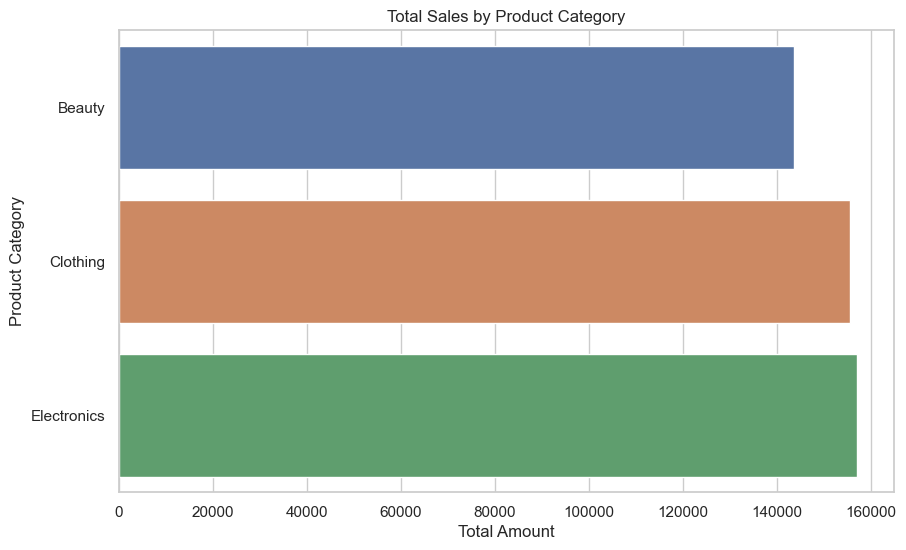

In [27]:
# Bar plot for total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Product Category', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.show()


In [29]:
# Check data types
print(monthly_sales.dtypes)

Month-Year      period[M]
Total Amount        int64
dtype: object


In [30]:
# Convert 'Total Amount' to numeric, if necessary
monthly_sales['Total Amount'] = pd.to_numeric(monthly_sales['Total Amount'], errors='coerce')

# Check for NaN values after conversion
print(monthly_sales.isna().sum())

Month-Year      0
Total Amount    0
dtype: int64


In [31]:
# Convert 'Month-Year' back to string if needed
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)


C:\Users\moizr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moizr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


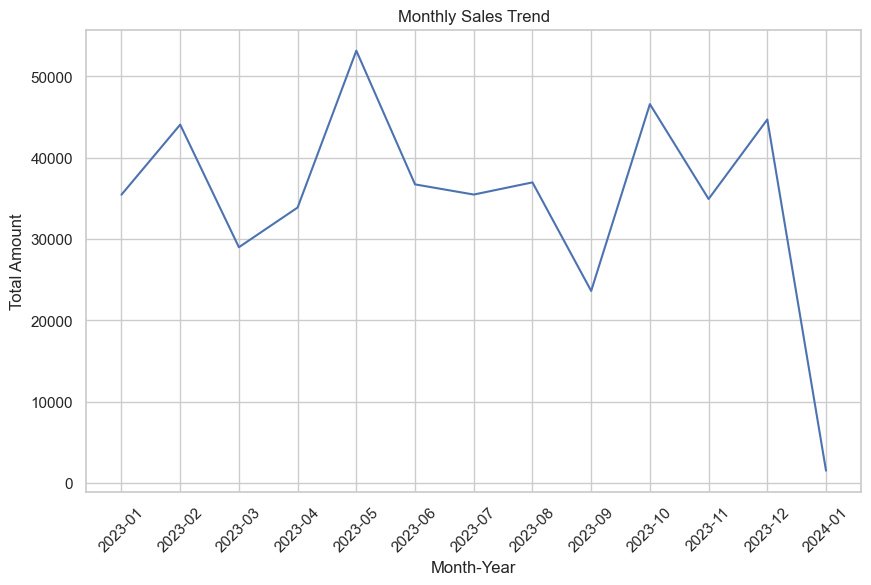

In [34]:
# Line plot for monthly sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month-Year', y='Total Amount', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()